In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
from tradingenv.world import *
from tradingenv.traders import *

In [55]:
traders = []

for i in range(1, 4):
    traders.append(RandomAITrader(name="GenericTrader"+str(i)))
    traders.append(RandomAITrader(name="EagerTrader"+str(i), eagerness=0.01))
    traders.append(RandomAITrader(name="UberAggressiveTrader"+str(i), eagerness=0.01, aggression=10, size_aggression=10))
    traders.append(RandomAITrader(name="BidAggressiveTrader"+str(i), aggression=10))
    traders.append(RandomAITrader(name="UnpredictableTrader"+str(i), unpredictability=4))
    traders.append(RandomAITrader(name="BullishTrader"+str(i), bullish=1, marketorder_eagerness=0))
    traders.append(RandomAITrader(name="BearishTrader"+str(i), bullish=0, marketorder_eagerness=0))
    
traders.append(ContestantTrader(name="Lebron", prediction_offness=0.01))

In [56]:
w = World(dividend_var=0, dividend_interval=25000, news_rarity=2500000, traders=traders)

for i in range(10000):
    w.run_ply(verbose=False)
    w.next_ply()

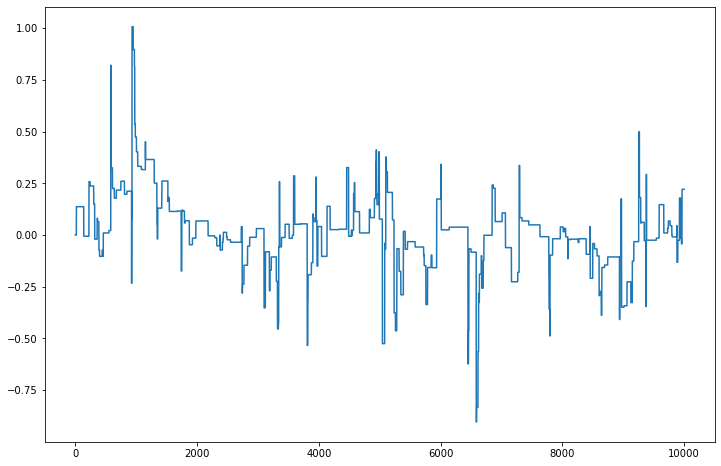

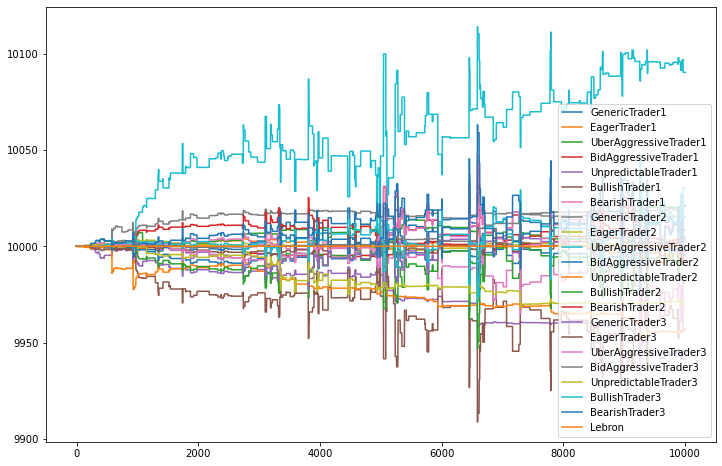

In [57]:
w.plot_stock_history()
w.plot_asset_value_history()

In [58]:
capital = 0
asset_value = 0

print("Sorting Traders by PnL:\n")
sorted_traders = sorted(w.traders, key=lambda var: var.total_asset_value)[::-1]
for trader in sorted_traders:
    print(trader.name, trader.total_asset_value)
    capital += trader.capital
    asset_value += trader.total_asset_value
    
assert round(capital, 2) == round(asset_value, 2)

print(f"\n\nTotal transactions in simulation: {len(w.transactions)}")

Sorting Traders by PnL:

UberAggressiveTrader2 10090.244999999992
BullishTrader3 10030.387999999997
UberAggressiveTrader1 10021.29
GenericTrader2 10021.025999999994
BidAggressiveTrader2 10020.787000000004
BidAggressiveTrader3 10015.337000000001
BullishTrader2 10008.381999999998
EagerTrader3 10004.707000000006
GenericTrader1 10004.241999999998
UberAggressiveTrader3 10003.390000000003
GenericTrader3 10000.345999999992
Lebron 10000
EagerTrader2 9998.242000000007
BidAggressiveTrader1 9997.446999999998
BearishTrader3 9995.498000000003
EagerTrader1 9991.802000000003
BearishTrader2 9990.328000000005
BullishTrader1 9982.333999999999
UnpredictableTrader3 9969.389000000001
BearishTrader1 9957.177999999998
UnpredictableTrader2 9956.284999999993
UnpredictableTrader1 9941.357000000005


Total transactions in simulation: 402


In [59]:
print(w.orderbook)

Buy Orders sorted by priority:

1. RWFnZXJUcmFkZXIxOTkzMDdMQjEwOTMwLTAuMDQz: EagerTrader1 -0.043 bid for 1, good till 10930, order submitted at time 9930
2. QnVsbGlzaFRyYWRlcjE5ODcxNExCMTA4NzEtMC4wNzE=: BullishTrader1 -0.071 bid for 4, good till 10871, order submitted at time 9871
3. QnVsbGlzaFRyYWRlcjM5NzcwNExCMTA3NzAtMC4wNzI=: BullishTrader3 -0.072 bid for 4, good till 10770, order submitted at time 9770
4. VW5wcmVkaWN0YWJsZVRyYWRlcjE5NTQ1N0xCMTA1NDUtMC4wOTM=: UnpredictableTrader1 -0.093 bid for 7, good till 10545, order submitted at time 9545
5. QnVsbGlzaFRyYWRlcjI5OTc1MkxCMTA5NzUtMC4xMDc=: BullishTrader2 -0.107 bid for 2, good till 10975, order submitted at time 9975
6. QnVsbGlzaFRyYWRlcjI5NjU5NUxCMTA2NTktMC4xMTI=: BullishTrader2 -0.112 bid for 5, good till 10659, order submitted at time 9659
7. VWJlckFnZ3Jlc3NpdmVUcmFkZXIxOTU3MjZMQjEwNTcyLTAuMTE0: UberAggressiveTrader1 -0.114 bid for 6, good till 10572, order submitted at time 9572
8. R2VuZXJpY1RyYWRlcjE5NDgwOExCMTA0ODAtMC4xMg==: 

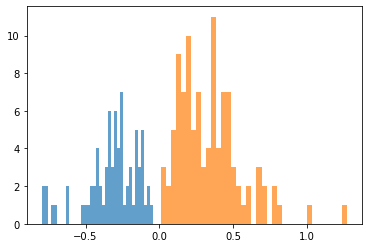

Orderbook Histogram

In [60]:
w.orderbook

10 simulations complete.
20 simulations complete.
30 simulations complete.
40 simulations complete.


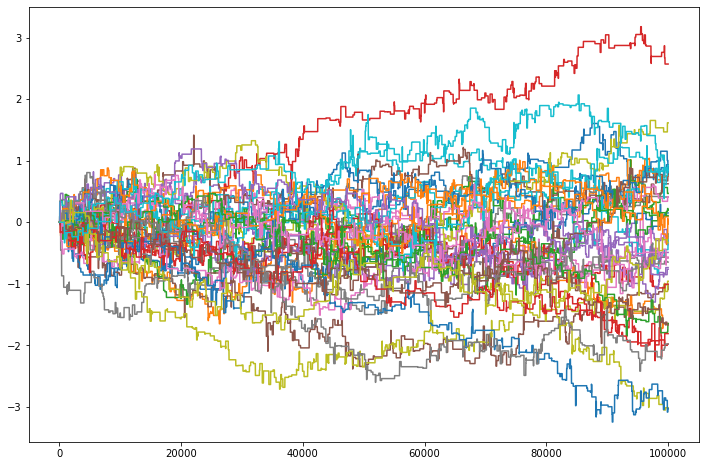

In [61]:
plt.figure(figsize=(12,8))
for i in range(40):
    w = World(dividend_var=1, dividend_interval=10000, news_rarity=25000)
    
    for _ in range(100000):
        w.run_ply(verbose=False)
        w.next_ply()
    plt.plot(w.price_history)
    if i % 10 == 9:
        print(f"{i+1} simulations complete.")
    
plt.show()

In [62]:
w.orderbook.get_anonymized_book()

([<tradingenv.order.Order at 0x7fa92fe1aad0>,
  <tradingenv.order.Order at 0x7fa931127a10>])